In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend
from keras_tqdm import TQDMNotebookCallback
from matplotlib import rc
rc("font", family="serif", size=14)
from datetime import datetime

Using TensorFlow backend.


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
10000


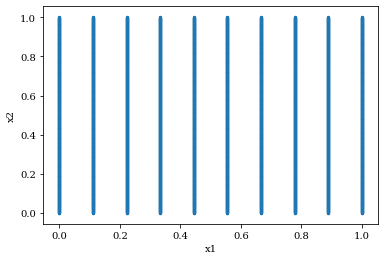

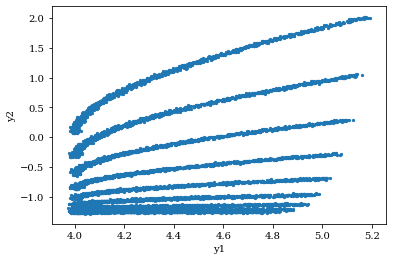

In [118]:
#constructing data
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

InputRange=[0,1]
N=1000*10
noise=0.01
#x1=np.random.rand(N)*(InputRange[1]-InputRange[0])+InputRange[0]
x1_pos=np.linspace(InputRange[0],InputRange[1],10)
print(x1_pos)
x1=np.array([])
for pos in x1_pos:
    x1=np.append(x1,np.ones(int(N/len(x1_pos)))*pos)
print(len(x1))
x2_one=np.linspace(InputRange[0],InputRange[1],int(N/len(x1_pos)))
x2=x2_one.copy()
for pos in x1_pos[1:]:
    x2=np.append(x2,x2_one)
x1,x2=unison_shuffled_copies(x1,x2)
plt.scatter(x1,x2,s=5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
def caly1(x1,x2):
    return (x1+0.5)**0.4*x2**2+4
def caly2(x1,x2):
    return x1**3*(x2+1.2)**1.5-1.25
y1=caly1(x1,x2)+np.random.randn(len(y1))*noise
y2=caly2(x1,x2)+np.random.randn(len(y1))*noise
plt.scatter(y1,y2,s=5)
plt.xlabel('y1')
plt.ylabel('y2')
plt.show()

In [119]:
x1_test=0.72*np.ones(int(N/10))
x2_test=np.random.rand(int(N/10))*(InputRange[1]-InputRange[0])+InputRange[0]
y1_test=caly1(x1_test,x2_test)
y2_test=caly2(x1_test,x2_test)

In [120]:
New_model=True
no_layers=4
no_nodes=16
regularization=0.001
if New_model:
    inputs=keras.Input(shape=(2,))
    xx=keras.layers.Dense(no_nodes,activation='relu')(inputs)
    for i in range(no_layers-1):
        xx=keras.layers.Dense(no_nodes,activation='relu')(xx)
        #xx=keras.layers.Dropout(0.05)(xx)
        #xx=keras.layers.Dense(no_nodes,activation='relu',kernel_regularizer=keras.regularizers.l1(regularization))(xx)
    outputs=keras.layers.Dense(2,activation='linear')(xx)
    model = keras.Model(inputs=inputs, outputs=outputs)
else:
    model = keras.models.load_model('2D_model.h5')
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_51 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_52 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_53 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_54 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 34        
Total params: 898
Trainable params: 898
Non-trainable params: 0
____________________________________________________________

In [121]:
optimizer=keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,loss='MAE')

In [122]:
epoch_no=20000
class showProgress(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % int(epoch_no/100) == 0:
            percent= int(np.round((epoch/int(epoch_no/100)),0))
            time=datetime.now()
            time_lapsed = (time-start_time)
            print(str(percent)+'% | epoch='+str(epoch)+'/'+str(epoch_no)+' | now='+str(time)[:-7]+
                  ' | time lapsed='+str(time_lapsed)[:-7]+' | loss='+str(np.round(logs['loss'],5)))

logdir = "logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
#logdir='logs'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
            
start_time=datetime.now()
history=model.fit(np.array([x1,x2]).T,np.array([y1,y2]).T,
                  epochs=epoch_no,
                  batch_size=N,
                  #validation_data=(np.array([x1_test,x2_test]).T,np.array([y1_test,y2_test]).T),
                  verbose=0,
                  callbacks=[showProgress(),tensorboard_callback])
print('training done! now='+str(datetime.now())+' | Time lapsed='+str(datetime.now()-start_time))
model.save('2D_model.h5')

0% | epoch=0/20000 | now=2019-11-08 00:44:45 | time lapsed=0:00:02 | loss=2.63267
1% | epoch=200/20000 | now=2019-11-08 00:44:47 | time lapsed=0:00:05 | loss=0.15583
2% | epoch=400/20000 | now=2019-11-08 00:44:49 | time lapsed=0:00:07 | loss=0.10185
3% | epoch=600/20000 | now=2019-11-08 00:44:51 | time lapsed=0:00:09 | loss=0.07546
4% | epoch=800/20000 | now=2019-11-08 00:44:53 | time lapsed=0:00:11 | loss=0.05973
5% | epoch=1000/20000 | now=2019-11-08 00:44:55 | time lapsed=0:00:12 | loss=0.05283
6% | epoch=1200/20000 | now=2019-11-08 00:44:57 | time lapsed=0:00:14 | loss=0.04297
7% | epoch=1400/20000 | now=2019-11-08 00:44:59 | time lapsed=0:00:16 | loss=0.03833
8% | epoch=1600/20000 | now=2019-11-08 00:45:01 | time lapsed=0:00:18 | loss=0.03508
9% | epoch=1800/20000 | now=2019-11-08 00:45:03 | time lapsed=0:00:20 | loss=0.03248
10% | epoch=2000/20000 | now=2019-11-08 00:45:05 | time lapsed=0:00:23 | loss=0.03085
11% | epoch=2200/20000 | now=2019-11-08 00:45:08 | time lapsed=0:00:25 

93% | epoch=18600/20000 | now=2019-11-08 00:48:18 | time lapsed=0:03:35 | loss=0.01726
94% | epoch=18800/20000 | now=2019-11-08 00:48:20 | time lapsed=0:03:37 | loss=0.01735
95% | epoch=19000/20000 | now=2019-11-08 00:48:22 | time lapsed=0:03:39 | loss=0.01731
96% | epoch=19200/20000 | now=2019-11-08 00:48:24 | time lapsed=0:03:42 | loss=0.01723
97% | epoch=19400/20000 | now=2019-11-08 00:48:27 | time lapsed=0:03:44 | loss=0.01752
98% | epoch=19600/20000 | now=2019-11-08 00:48:29 | time lapsed=0:03:46 | loss=0.01745
99% | epoch=19800/20000 | now=2019-11-08 00:48:31 | time lapsed=0:03:48 | loss=0.01703
training done! now=2019-11-08 00:48:33.810359 | Time lapsed=0:03:50.950808


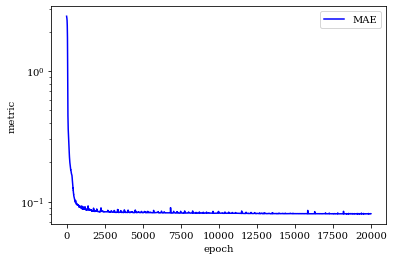

In [114]:
epoch = history.epoch
hist=history.history
#MAE,MSE,valMAE,valMSE=hist['MAE'],hist['MSE'],hist['val_MAE'],hist['val_MSE']
MAE=hist['loss']
plt.plot(epoch,MAE,'b-',label='MAE')
#plt.plot(epoch,MSE,'b--',label='MSE')
#plt.plot(epoch,valMAE,'r-',label='valMAE')
#plt.plot(epoch,valMSE,'r--',label='valMSE')
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('metric')
plt.legend()
plt.show()

In [115]:
model.evaluate(np.array([x1_test,x2_test]).T,np.array([y1_test,y2_test]).T,verbose=2)

1000/1 - 0s - loss: 0.0112


0.009925944589078426

10000/1 - 0s
10000/1 - 0s


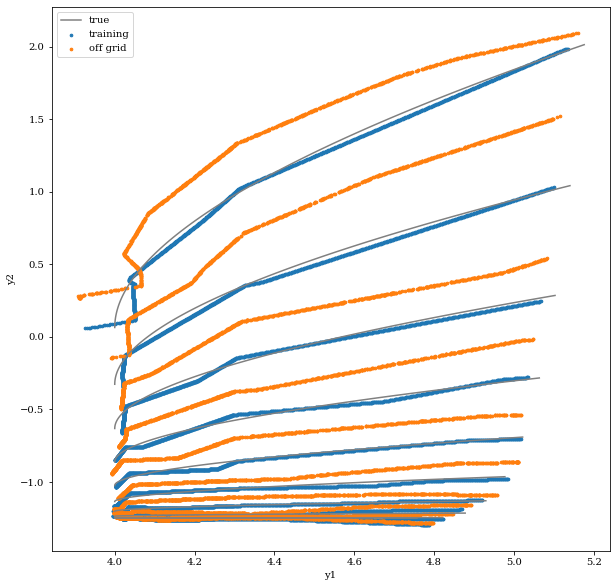

In [116]:
plt.figure(figsize=[10,10])
on_grid_predict=(model.predict(np.array([x1,x2]).T,verbose=2)).T
labeled=False
for pos in x1_pos:
    x1s=np.ones(100)*pos
    x2s=np.linspace(InputRange[0],InputRange[1],100)
    if labeled==False:
        plt.plot(caly1(x1s,x2s),caly2(x1s,x2s),color='grey',label='true')
        labeled=True
    else: plt.plot(caly1(x1s,x2s),caly2(x1s,x2s),color='grey')
plt.scatter(*on_grid_predict,s=7,label='training')
shifted_x1_pos=x1_pos+(x1_pos[1]-x1_pos[0])/2
X1=np.array([])
for pos in shifted_x1_pos:
    X1=np.append(X1,np.ones(int(N/10))*pos)
X2=np.random.rand(N)*(InputRange[1]-InputRange[0])+InputRange[0]
off_grid_predict=(model.predict(np.array([X1,X2]).T,verbose=2)).T
plt.scatter(*off_grid_predict,s=7,label='off grid')
plt.xlabel('y1')
plt.ylabel('y2')
plt.legend()
plt.show()